In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import math
import scipy
import itertools
import operator
from sympy import *
import sys
from scipy.stats import beta
import statistics
from scipy.stats import norm

In [229]:
############################# Problem 1

(array([  8.,  15.,  38.,  75., 104., 136., 133.,  95.,  65.,  35.,  24.,
         22.,  46.,  45.,  57.,  51.,  27.,  11.,  11.,   2.]),
 array([-7.08103792, -5.52394799, -3.96685807, -2.40976814, -0.85267821,
         0.70441172,  2.26150165,  3.81859157,  5.3756815 ,  6.93277143,
         8.48986136, 10.04695128, 11.60404121, 13.16113114, 14.71822107,
        16.275311  , 17.83240092, 19.38949085, 20.94658078, 22.50367071,
        24.06076063]),
 <BarContainer object of 20 artists>)

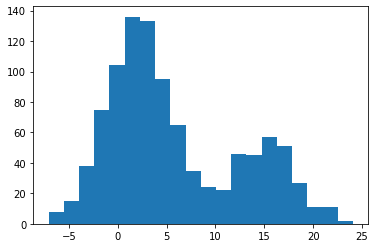

In [230]:
# Providing initial values for my Gaussian Mixture Model
pi1 = .7
mean1 = 2
mean2 = 15
Tau = .3

# Initializing how many data points I want, and instantiating the lists that will take my data
N = 1000
data = []
w1 = []
w2 = []

# Loop to create data points for my Gaussian Mixture Model
for i in range(N):
    k = random.random() # Samples a random number between 0 and 1
    if k <= pi1: 
        y = np.random.normal(mean1, (1 / Tau))
        w1.append(y)
        data.append(y)
    else:
        y = np.random.normal(mean2, (1 / Tau))
        w2.append(y)
        data.append(y)
        
plt.hist(data, bins = 20) # This is what the histogram of my data looks like

In [231]:
# Initializing my guesses of the parameters of my Gaussian Mixture Model
mu1_i = 3
mu2_i = 10
omega_i = 1
tau_i = .5
s = []
w1 = []
w2 = []

# This is also my guess for what the values of s_n should be.
for i in range(len(data)):
    if data[i] <= 10: # The reason I chose 10 to determine whether s is either 1 or 2 is because in my plot above, it looks like
                      # the exact halfway point between my gaussian distributions would be around 10.
        w1.append(data[i])
        s.append(1)
    if data[i] > 10:
        w2.append(data[i])
        s.append(2)

In [232]:
N1 = len(w1)
N2 = len(w2)

# Below I am storing my initial guesses of the respective parameters into a list that will later be used in my Gibbs Sampler
mu1 = []
mu1.append(mu1_i)

mu2 = []
mu2.append(mu2_i)

omega = []
omega.append(omega_i)

tau = []
tau.append(tau_i)

# These are my guess values for my hyperparameters
alpha = 2
beta = 3
A = 2
B = 3
xi = 2
psi = 4

In [233]:
sample_N = 100
# The loop for my Gibbs Sampler
for i in range(sample_N):
    # Sampling omega from a beta distribution
    weight = np.random.beta(A + N1, B + N2)
    omega.append(weight)
    
    # Sampling for tau
    M = len(data)
    total = 0
    # Below is a loop to get the value of Ns (which is from page 158 of the book). 
    for i in range(len(data)):
        if s[i] == 1:
            temp = (data[i] - mu1_i)**2
        else:
            temp = (data[i] - mu2_i)**2
        total = total + temp
    tau_inew = np.sqrt(np.random.gamma(alpha + (M / 2), (1 / (beta + (total / 2)))))
    tau.append(tau_inew)
    
    # Sampling for mu1
    mu1_i = np.random.normal((statistics.mean(w1) * N1 * tau_i + (xi / psi)) / (N1 * tau_i + (1 / psi)), (1 / (N1 * tau_i + 1 / psi)))
    mu1.append(mu1_i)
    
    # Sampling for mu2
    mu2_i = np.random.normal((statistics.mean(w2) * N2 * tau_i + (xi / psi)) / (N2 * tau_i + (1 / psi)), (1 / (N2 * tau_i + 1 / psi)))
    mu2.append(mu2_i)
    
    s = []
    w1 = []
    w2 = []
    # Loop for finding my new values of s, w1, w2, N1, and N2 to reuse in the next interation
    for i in range(len(data)):
        if weight * norm.pdf(np.random.normal(mu1_i, (1 / tau_i)), data[i]) > (1 - weight) * norm.pdf(np.random.normal(mu2_i, (1 / tau_i)), data[i]):
            s.append(1)
            w1.append(data[i])
        else:
            s.append(2)
            w2.append(data[i])
        N1 = len(w1)
        N2 = len(w2)        

In [ ]:
# The following are the results from my Gibbs Sampler, and comparing them to the actual values of their respective parameters.

The actual omega is: 0.7 
My initial guess was: 1 
The estimated omega is: 0.6942


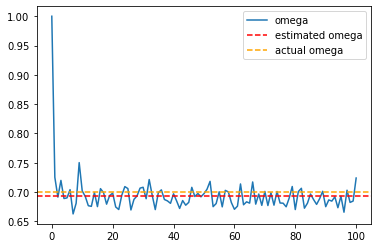

In [236]:
plt.plot(omega)
plt.axhline(y = statistics.mean(omega), linestyle = '--', color = 'red')
plt.axhline(y = pi1, linestyle = '--', color = 'orange')
plt.legend(["omega", "estimated omega", "actual omega"])
print("The actual omega is:", pi1, "\nMy initial guess was:", omega_i,"\nThe estimated omega is:", np.around(np.array(statistics.mean(omega)), 4), )

The actual tau is: 0.3 
My initial guess was: 0.5 
The estimated tau is: 0.309


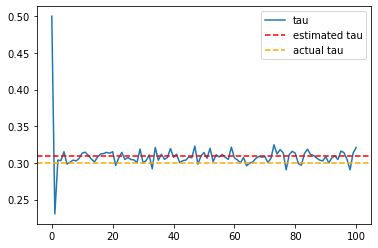

In [237]:
plt.plot(tau)
plt.axhline(y = statistics.mean(tau), linestyle = '--', color = 'red')
plt.axhline(y = Tau, linestyle = '--', color = 'orange')
plt.legend(["tau", "estimated tau", "actual tau"])
print("The actual tau is:", Tau, "\nMy initial guess was:", tau_i,"\nThe estimated tau is:", np.around(np.array(statistics.mean(tau)), 4), )

The actual μ1 is: 2 
My initial guess was: 3 
The estimated μ1 is: 1.8441


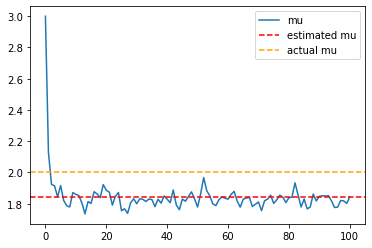

In [240]:
plt.plot(mu1)
plt.axhline(y = statistics.mean(mu1), linestyle = '--', color = 'red')
plt.axhline(y = mean1, linestyle = '--', color = 'orange')
plt.legend(["mu", "estimated mu", "actual mu"])
print("The actual \u03BC1 is:", mean1, "\nMy initial guess was:", mu1[0],"\nThe estimated \u03BC1 is:", np.around(np.array(statistics.mean(mu1)), 4), )

The actual μ2 is: 15 
My initial guess was: 10 
The estimated μ2 is: 14.5931


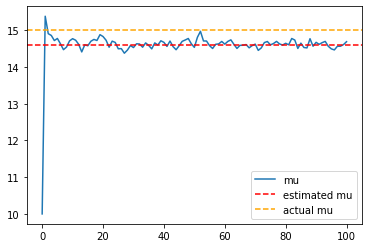

In [242]:
plt.plot(mu2)
plt.axhline(y = statistics.mean(mu2), linestyle = '--', color = 'red')
plt.axhline(y = mean2, linestyle = '--', color = 'orange')
plt.legend(["mu", "estimated mu", "actual mu"])
print("The actual \u03BC2 is:", mean2, "\nMy initial guess was:", mu2[0],"\nThe estimated \u03BC2 is:", np.around(np.array(statistics.mean(mu2)), 4), )

In [210]:
###################################### Problem 2

(array([  2.,   0.,   2.,   4.,   6.,   8.,  23.,  45.,  62.,  61.,  72.,
         94.,  98., 100.,  90., 104.,  67.,  52.,  42.,  38.,  12.,   9.,
          4.,   2.,   3.]),
 array([22.30224428, 22.73573683, 23.16922938, 23.60272193, 24.03621448,
        24.46970703, 24.90319958, 25.33669214, 25.77018469, 26.20367724,
        26.63716979, 27.07066234, 27.50415489, 27.93764744, 28.37114   ,
        28.80463255, 29.2381251 , 29.67161765, 30.1051102 , 30.53860275,
        30.9720953 , 31.40558786, 31.83908041, 32.27257296, 32.70606551,
        33.13955806]),
 <BarContainer object of 25 artists>)

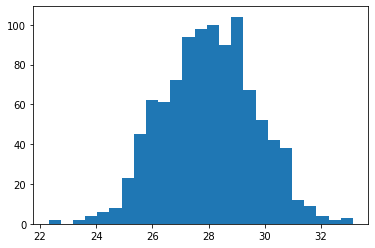

In [643]:
# Initializing my hyper-hyper parameters to obtain my hyper-parameters
n = 20
zeta = 4
xi = np.random.normal(n, zeta)

k = 2
lam = 4
psi = np.random.gamma(k, (1 / lam))

gamma = 8
omega = 2
alpha = np.random.gamma(gamma, (1 / omega))

rho = 5
phi = .5
beta = np.random.gamma(rho, (1 / phi))

# Using past results to obtain my parameters
mu = np.random.normal(xi, psi)
tau = np.random.gamma(alpha, (1 / beta))

# Creating a loop to store and later histogram my data using my parameters that were obtained from hyper-hyper parameters.
data = []
for i in range(1000):
    data_point = np.random.normal(mu, (1 / tau))
    data.append(data_point)
    
plt.hist(data, bins = 25) # Histogram of my data

In [ ]:
# Describing what my hyper-hyper parameters, hyper-parameters, and parameters are to make it visually easier to distinguish 
# between them.

In [644]:
print("My hyper-hyper parameters are:")
print("eta:", n)
print("zeta:", zeta)
print("kappa:", k)
print("lambda:", lam)
print("gamma:", gamma)
print("omega:", omega)
print("rho:", rho)
print("phi:", phi)

My hyper-hyper parameters are:
eta: 20
zeta: 4
kappa: 2
lambda: 4
gamma: 8
omega: 2
rho: 5
phi: 0.5


In [645]:
print("My hyper parameters are:")
print("xi:", xi)
print("psi:", psi)
print("alpha:", alpha)
print("beta:", beta)

My hyper parameters are:
xi: 28.13995268377485
psi: 0.31061763787546415
alpha: 3.8294145292336057
beta: 4.297284370584091


In [646]:
print("My parameters are:")
print("mu:", mu)
print("tau:", tau)

My parameters are:
mu: 28.016342461732393
tau: 0.6139616174775901


In [647]:
# My initial guesses for my hyper-parameters, and parameters
xi_i = 1
psi_i = 3
alpha_i = 1
beta_i = 1
mu_i = 10
tau_i = 1

# Storing my initial guesses in a list of their respective parameters to be used later to collect data
xi_list = [xi_i]
psi_list = [psi_i]
alpha_list = [alpha_i]
beta_list = [beta_i]
mu_list = [mu_i]
tau_list = [tau_i]

# My initial guesses for my hyper-hyper parameters
n_i = 15
zeta_i = 3
k_i = 2
lam_i = 6
gamma_i = 18
omega_i = 3
rho_i = 10
phi_i = 2

In [648]:
# Loop for my Gibbs Sampler
N = 500
for i in range(N):
    # Sampling for xi
    xi_i = np.random.normal(((n_i * psi_i**2 + mu_i * zeta_i**2) / (psi_i**2 + zeta_i **2)), ((zeta_i**2 * psi_i**2) / (psi_i**2 + zeta_i**2))**.5)
    xi_list.append(xi_i)
    
    # Sampling for psi
    psi_i = np.random.gamma((k_i + .5), (1 / (lam_i + .5 * (xi_i - mu_i))))
    psi_list.append(psi_i)
    
    # This is a function that contains my targetted distribution to later help find alpha
    def target(x):
        y = ((beta_i ** x) / (math.gamma(x))) * x**(gamma_i - 1) * tau_i**(x - 1) * np.exp(-omega_i * x)
        return y
    
    # Creating a list, X, that will be used in my Metropolis Sampler
    X = []
    for j in range(10**4):
        X.append(0)
    # Specifiying my initial value for X and specifying what my sigma is 
    X[0] = 3 
    sigma = .05
    
    # Loop of Metropolis Sampler to obtain alpha
    for i in range(1, len(X)):
        x_old = X[i - 1]
        x_prop = X[i - 1] + sigma * np.random.normal(0, 1)
        
        A = np.log(target(x_prop)) - np.log(target(x_old)) # Acceptance ratio
        v = np.random.exponential(1)
        
        # If v is greater than my acceptance ratio, accept my proposal. Otherwise, keep the old value of X
        if v > -A:
            X[i] = x_prop
        else:
            X[i] = x_old
            
    # Sampling for alpha
    alpha_new = statistics.mean(X)
    alpha_list.append(alpha_new)
    
    # Sampling for beta
    beta_new = np.random.gamma((rho_i + alpha_i), (1 / (phi_i + tau_i)))
    beta_list.append(beta_new)
    
    # Sampling for mu
    mu_i = np.random.normal(((statistics.mean(data) * len(data) * tau_i + (xi_i / psi_i)) / (len(data) * tau_i + (1 / psi_i))), (1 / (len(data) * tau_i + (1 / psi_i))))
    mu_list.append(mu_i)
    
    # Below is a loop to get the value of Ns (which is from page 158 of the book).
    M = len(data)
    total = 0
    for a in range(len(data)):
        temp = (data[a] - mu)**2
        total = total + temp
        
    # Sampling for tau
    tau_i = np.sqrt(np.random.gamma(alpha_i + (M / 2), (1 / (beta_i + .5 * total))))
    tau_list.append(tau_i)

In [ ]:
# The following are the results from my Gibbs Sampler, and comparing them to the actual values of their respective parameters.

My initial guess was: 1 
The approximated xi is: 27.6395 
The actual xi is: 28.13995268377485


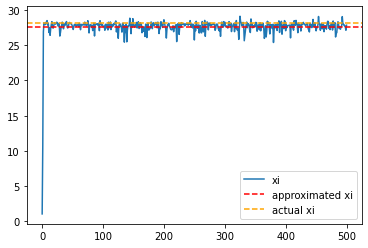

In [649]:
plt.plot(xi_list)
plt.axhline(y = statistics.mean(xi_list), linestyle = '--', color = 'red')
plt.axhline(y = xi, linestyle = '--', color = 'orange')
plt.legend(["xi", "approximated xi", "actual xi"])
print("My initial guess was:", xi_list[0],"\nThe approximated xi is:", np.around(np.array(statistics.mean(xi_list)), 4), "\nThe actual xi is:", xi)

My initial guess was: 3 
The approximated psi is: 0.4185 
The actual psi is: 0.31061763787546415


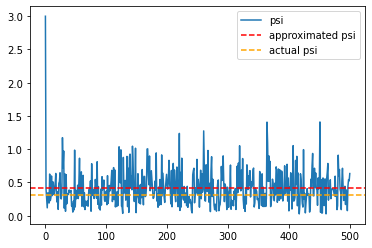

In [650]:
plt.plot(psi_list)
plt.axhline(y = statistics.mean(psi_list), linestyle = '--', color = 'red')
plt.axhline(y = psi, linestyle = '--', color = 'orange')
plt.legend(["psi", "approximated psi", "actual psi"])
print("My initial guess was:", psi_list[0],"\nThe approximated psi is:", np.around(np.array(statistics.mean(psi_list)), 4), "\nThe actual psi is:", psi)

My initial guess was: 1 
The approximated alpha is: 3.7552 
The actual alpha is: 3.8294145292336057


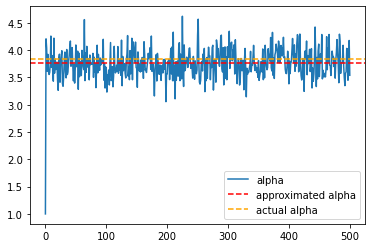

In [651]:
plt.plot(alpha_list)
plt.axhline(y = statistics.mean(alpha_list), linestyle = '--', color = 'red')
plt.axhline(y = alpha, linestyle = '--', color = 'orange')
plt.legend(["alpha", "approximated alpha", "actual alpha"])
print("My initial guess was:", alpha_list[0],"\nThe approximated alpha is:", np.around(np.array(statistics.mean(alpha_list)), 4), "\nThe actual alpha is:", alpha)

My initial guess was: 1 
The approximated beta is: 4.3025 
The actual beta is: 4.297284370584091


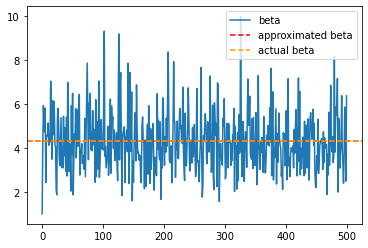

In [652]:
plt.plot(beta_list)
plt.axhline(y = statistics.mean(beta_list), linestyle = '--', color = 'red')
plt.axhline(y = beta, linestyle = '--', color = 'orange')
plt.legend(["beta", "approximated beta", "actual beta"])
print("My initial guess was:", beta_list[0],"\nThe approximated beta is:", np.around(np.array(statistics.mean(beta_list)), 4), "\nThe actual beta is:", beta)

My initial guess was: 10 
The approximated mu is: 27.986 
The actual mu is: 28.016342461732393


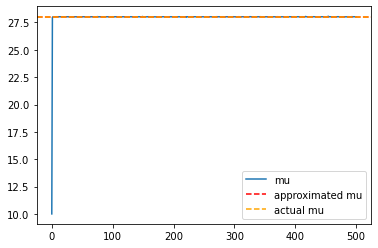

In [653]:
plt.plot(mu_list)
plt.axhline(y = statistics.mean(mu_list), linestyle = '--', color = 'red')
plt.axhline(y = mu, linestyle = '--', color = 'orange')
plt.legend(["mu", "approximated mu", "actual mu"])
print("My initial guess was:", mu_list[0],"\nThe approximated mu is:", np.around(np.array(statistics.mean(mu_list)), 4), "\nThe actual mu is:", mu)

My initial guess was: 1 
The approximated tau is: 0.6042 
The actual tau is: 0.6139616174775901


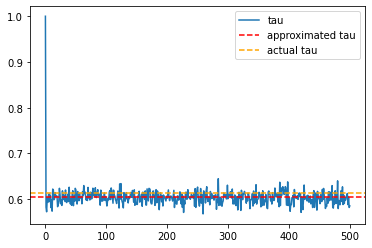

In [654]:
plt.plot(tau_list)
plt.axhline(y = statistics.mean(tau_list), linestyle = '--', color = 'red')
plt.axhline(y = tau, linestyle = '--', color = 'orange')
plt.legend(["tau", "approximated tau", "actual tau"])
print("My initial guess was:", tau_list[0],"\nThe approximated tau is:", np.around(np.array(statistics.mean(tau_list)), 4), "\nThe actual tau is:", tau)